In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# for null values 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# No null value

# Lets see the description

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Age skew to the right because the mean value is greater than the mmedian value
# The value of mean is almost equal to the median value in bmi column, so slightly skew to the right
# The value of mean is almost equal to the median value in children column, so slightly skew to the right
# Charges skew to the right because the mean value is greater than the mmedian value
# there are possible outliers because the margin between the Q3 values and max values for some columns(bmi, charges)
# are too much

# Charges is the target class while age,bmi and age are the features

# I need to check for outliers

plt.figure(figsize=(8,6), facecolor='white')
plotnumber = 1
for col in df:
    if plotnumber <= 11:
        ax = plt.subplot(2,2, plotnumber)
        snb.boxplot(df[col], palette="Blues")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=180, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [10]:
# Check for datatypes to ensure they in format that can be analysed

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

male      676
female    662
Name: sex, dtype: int64


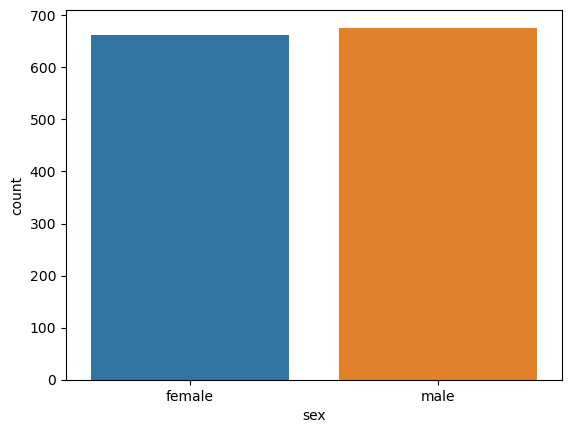

In [12]:
print(df['sex'].value_counts())
ax = snb.countplot(x='sex', data =df)

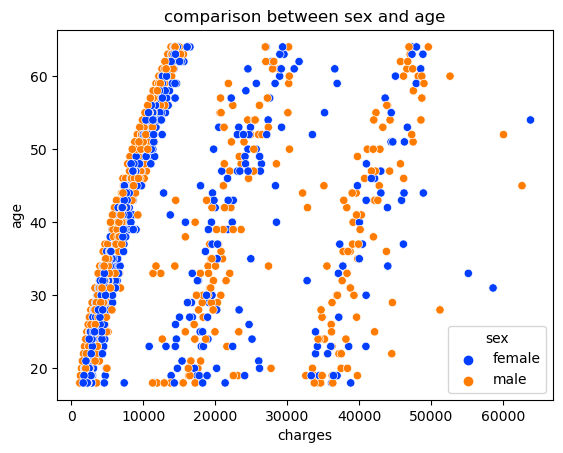

In [19]:
plt.title('comparison between sex and age')
snb.scatterplot(x='charges', y = 'age', data =df, hue='sex', palette='bright')
plt.show()

In [20]:
# Sex is evenly distributed and its not affecting the target, so I will drop it

df1 = df.drop('sex', axis = 1)

df1

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,southwest,16884.92400
1,18,33.770,1,0,southeast,1725.55230
2,28,33.000,3,0,southeast,4449.46200
3,33,22.705,0,0,northwest,21984.47061
4,32,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830
1334,18,31.920,0,0,northeast,2205.98080
1335,18,36.850,0,0,southeast,1629.83350
1336,21,25.800,0,0,southwest,2007.94500


0    1064
1     274
Name: smoker, dtype: int64


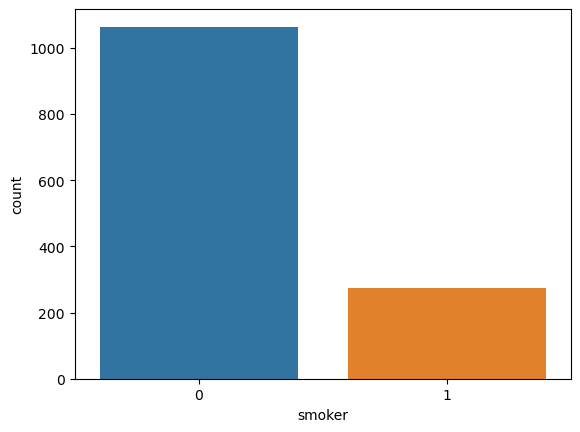

In [18]:
print(df['smoker'].value_counts())
ax = snb.countplot(x='smoker', data =df)

In [14]:

df["smoker"] = np.where(df["smoker"] == 'yes', 1, 0)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


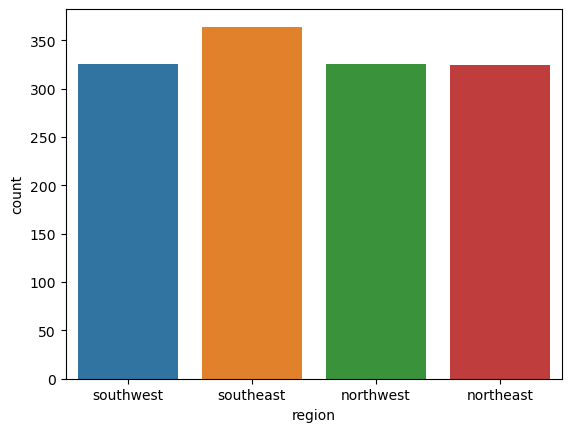

In [15]:
print(df['region'].value_counts())
ax = snb.countplot(x='region', data =df)

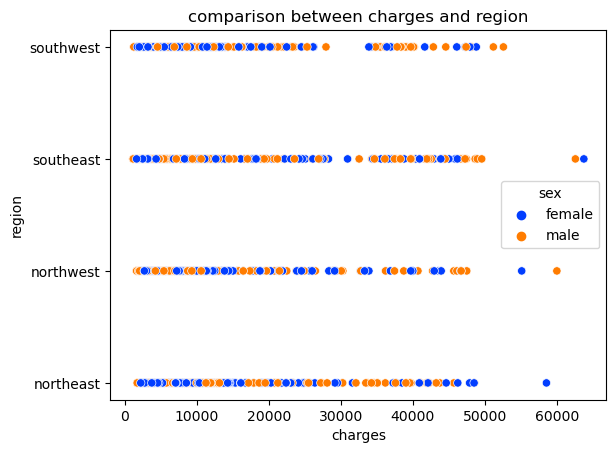

In [21]:
plt.title('comparison between charges and region')
snb.scatterplot(x='charges', y = 'region', data =df, hue='sex', palette='bright')
plt.show()

In [26]:
# To check for outliers I need to remove column of object datatype

df2 = df1.drop('region', axis = 1)

df2

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


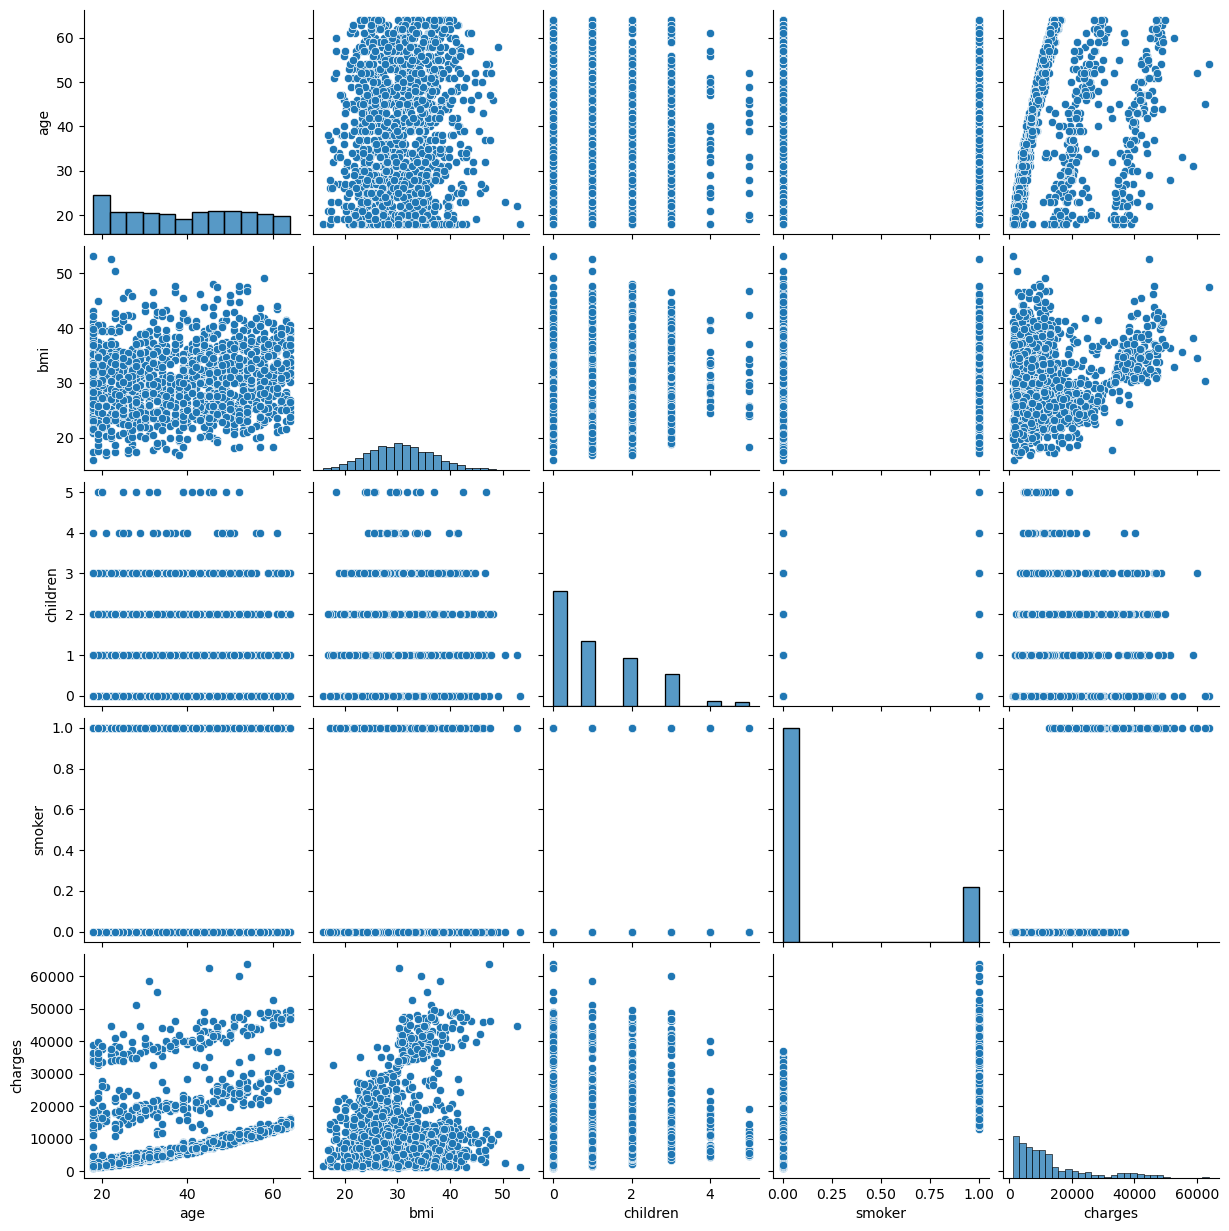

In [38]:
snb.pairplot(df2, palette='Dark2')
plt.show()

col number is:  age
col number is:  bmi
col number is:  children
col number is:  smoker
col number is:  charges


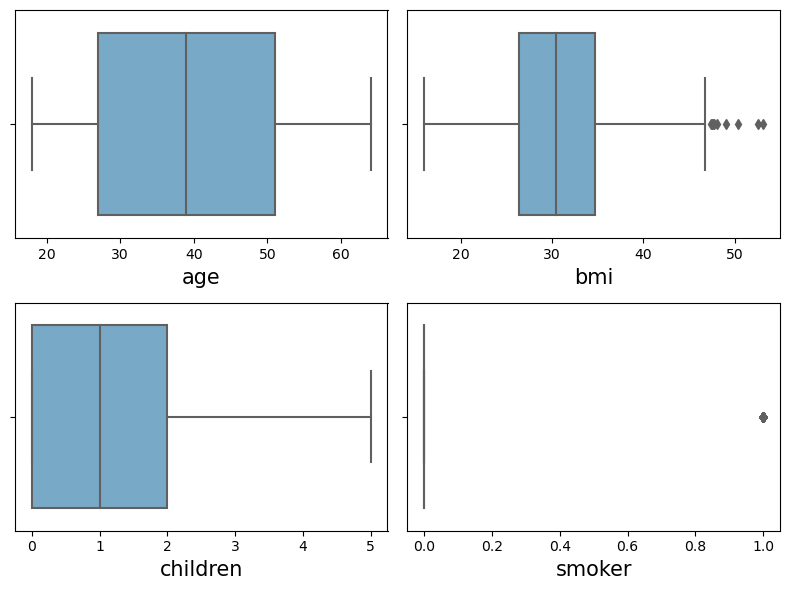

In [30]:
plt.figure(figsize=(8,6), facecolor='white')
plotnumber = 1 
for col in df2:
    print('col number is: ',col)
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        snb.boxplot(df2[col], palette="Blues")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=180, fontsize=10)
    plotnumber += 1 
plt.tight_layout()
plt.show()

In [31]:
# Smoker is a categorical class and the outlier will be ignored
# BMI has outliers and will be removed

#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['bmi']]
z=np.abs(zscore(out_features))

z

,bmi
0,0.453320
1,0.509621
2,0.383307
3,1.305531
4,0.292556
...,...
1333,0.050297
1334,0.206139
1335,1.014878
1336,0.797813


In [32]:
np.where(z>3)

(array([ 116,  847, 1047, 1317]), array([0, 0, 0, 0]))

In [33]:
df3 = df2[(z<3).all(axis=1)]

df3

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [35]:
#data loss is relatively not much

print('percentage data loss after removing outliers using IQR ', ((df2.shape[0] - df3.shape[0])/df2.shape[0])* 100)

percentage data loss after removing outliers using IQR  0.29895366218236175


In [40]:
# let me check for skewness

df3.skew()

age         0.053603
bmi         0.205622
children    0.935415
smoker      1.465804
charges     1.517663
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

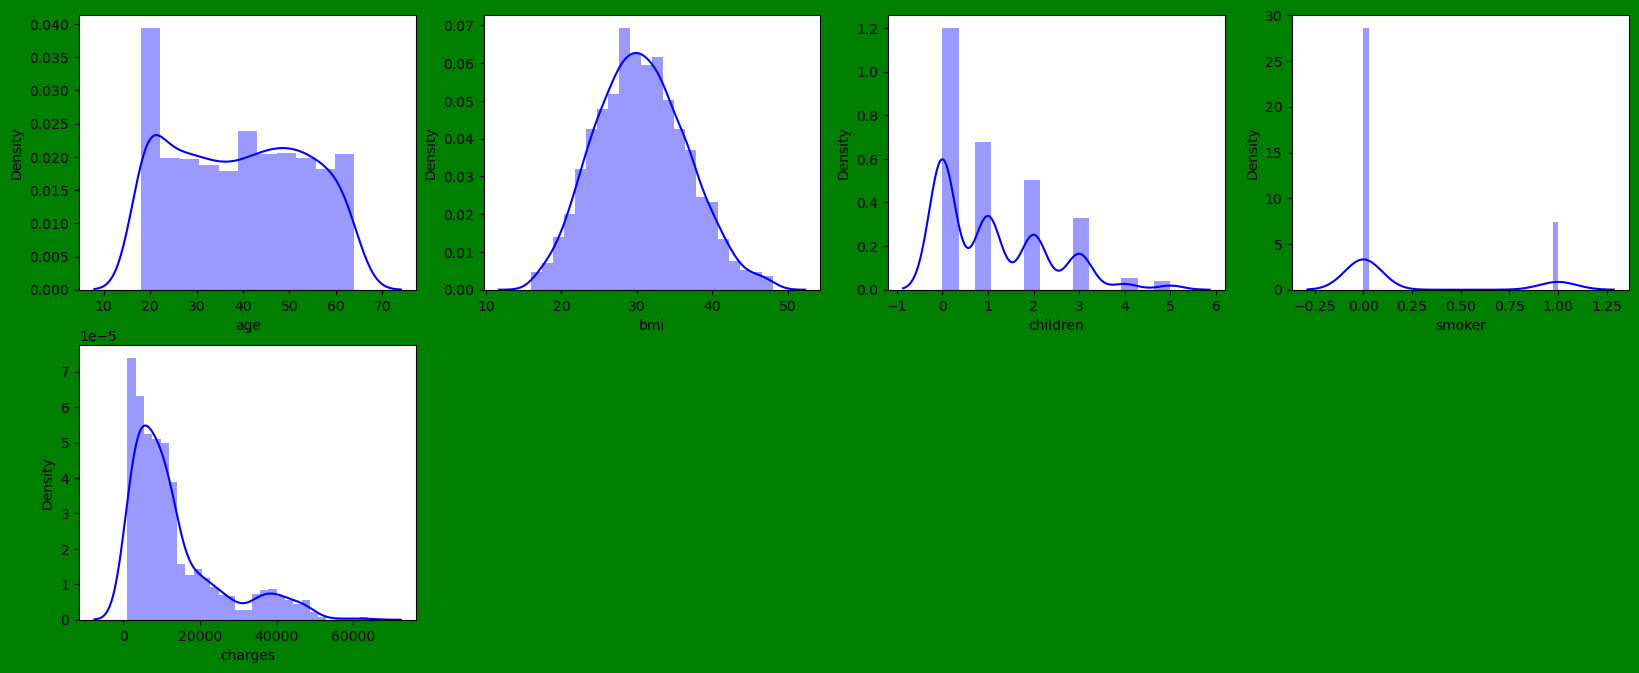

In [44]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='green')
p=1

for i in df3:
    if p<= 18:
        ax = plt.subplot(6,4,p)
        snb.distplot(df3[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [47]:
# all the columns are not in acceptable range of 0.5 to -0.5
# remove skewness using cuberoot method

df4 = np.cbrt(df3)

In [49]:
df4.skew()

age        -0.231800
bmi        -0.126795
children   -0.098167
smoker      1.465804
charges     0.516247
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

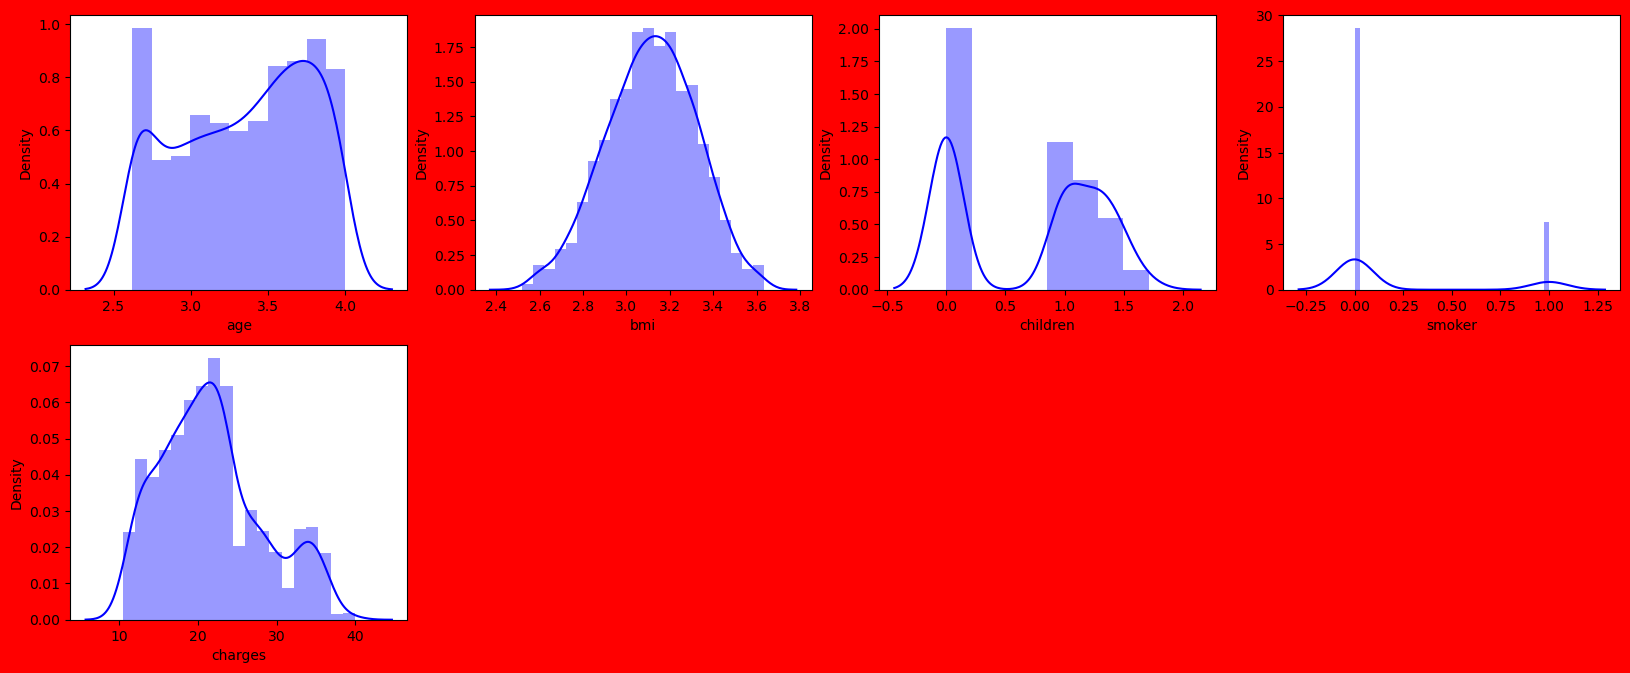

In [52]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df4:
    if p<= 18:
        ax = plt.subplot(6,4,p)
        snb.distplot(df4[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [53]:
# Check Corelation between target variable and independent variables

df4.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.118545,0.088965,-0.022374,0.453198
bmi,0.118545,1.000000,0.018928,0.000250,0.163485
children,0.088965,0.018928,1.000000,0.010463,0.127440
smoker,-0.022374,0.000250,0.010463,1.000000,0.732108
charges,0.453198,0.163485,0.127440,0.732108,1.000000


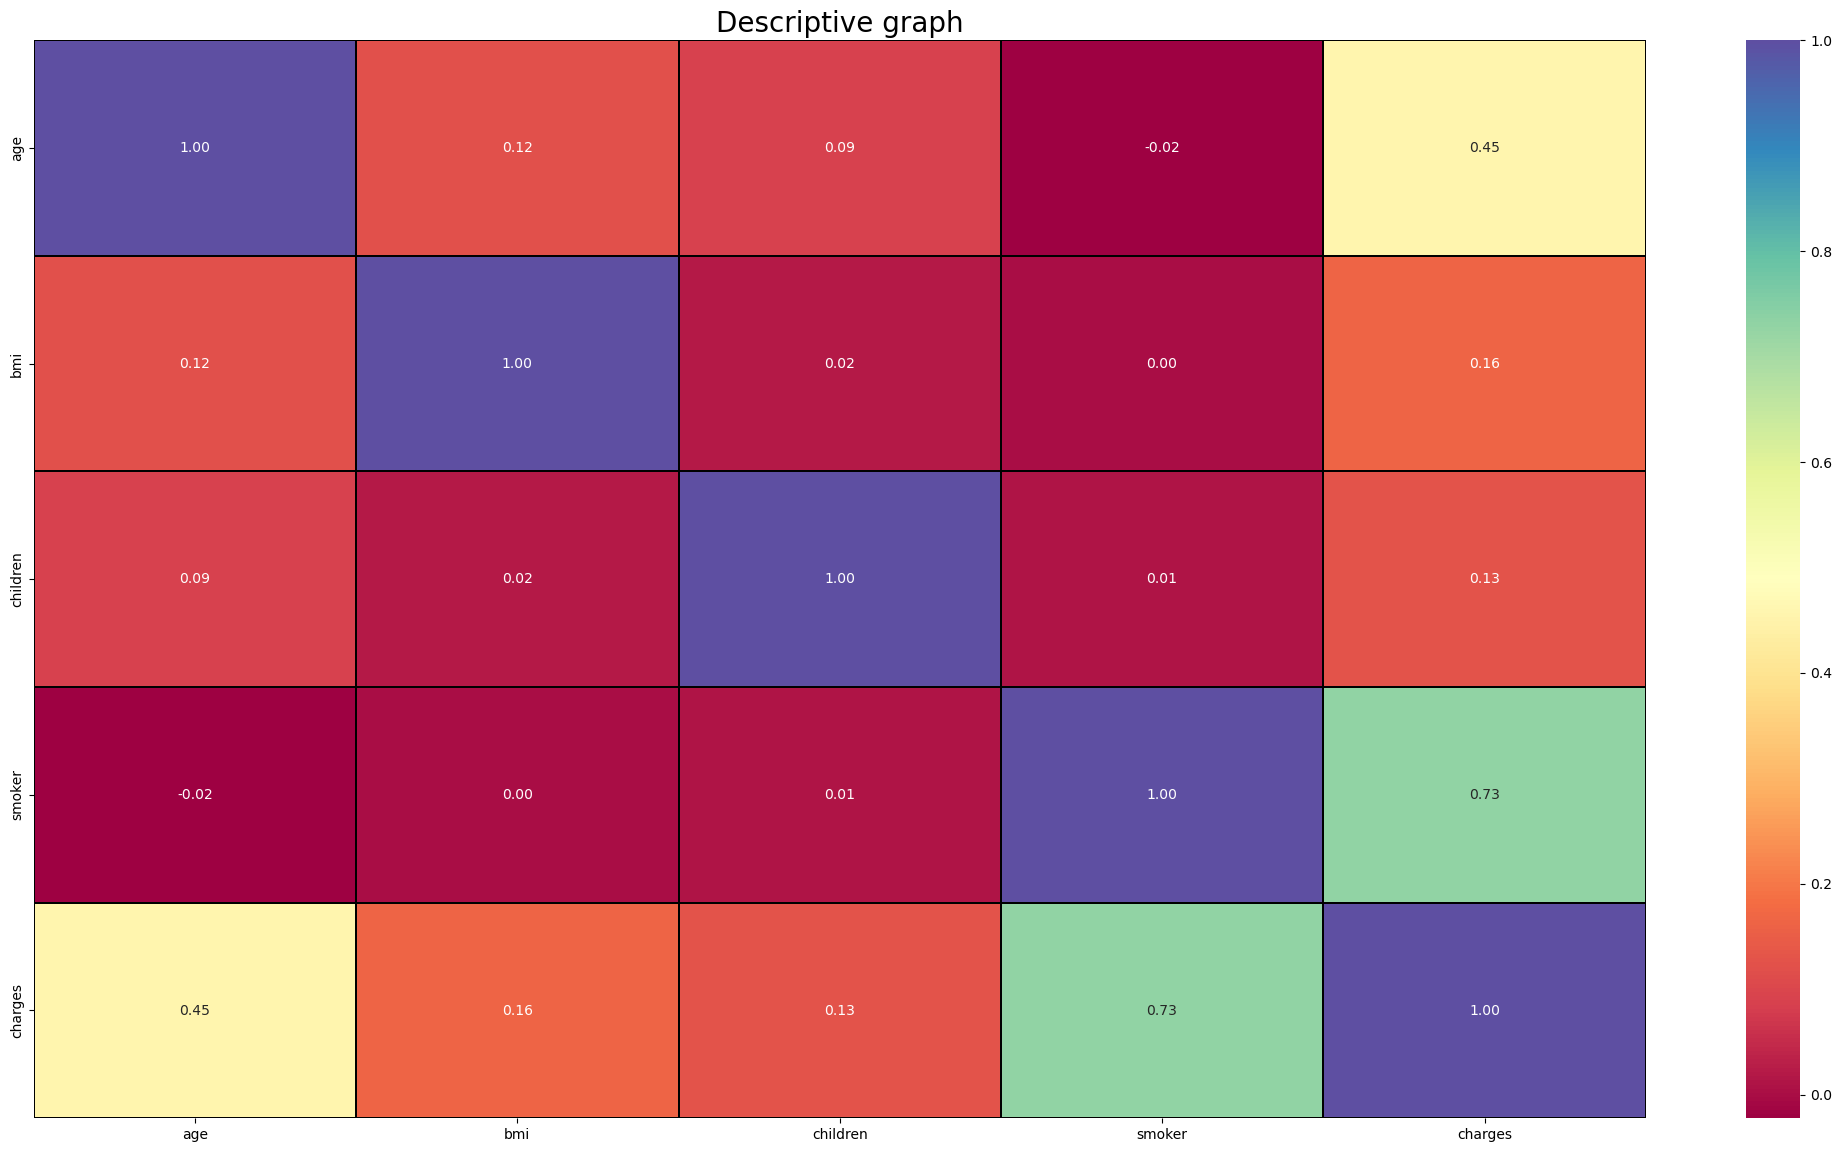

In [54]:
plt.figure(figsize=(26,14))
snb.heatmap(df.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

In [55]:
df.corr().charges.sort_values()

children    0.127440
bmi         0.163485
age         0.453198
smoker      0.732108
charges     1.000000
Name: charges, dtype: float64

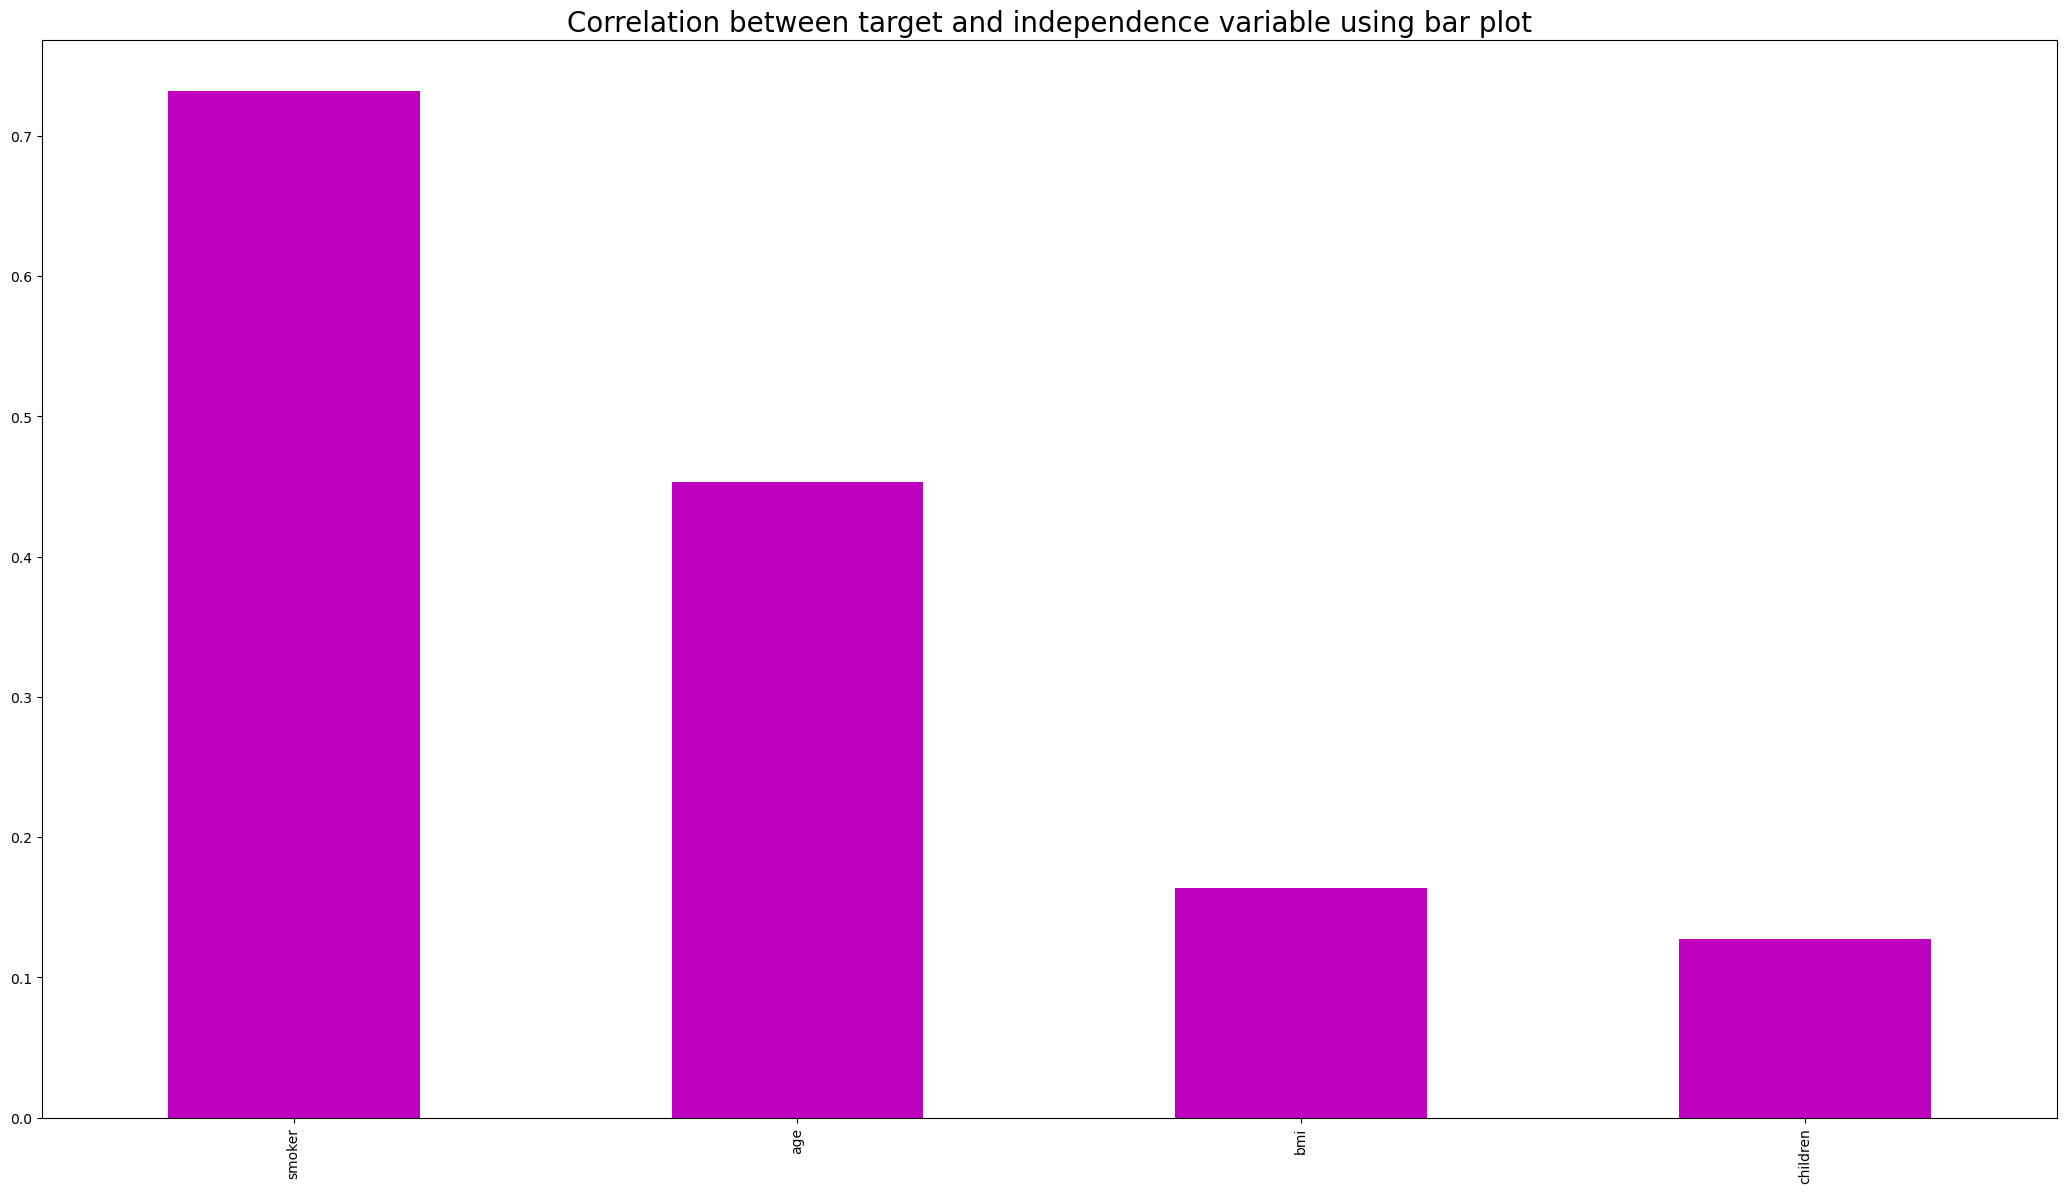

In [58]:
# Smoker is strongly related

# Visualizing the corelation between target and independent variables using bar plot
plt.figure(figsize=(26,14))
df4.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar', color='m')
plt.xlabel='feature'
plt.ylabel='target'
plt.title('Correlation between target and independence variable using bar plot', fontsize=20)
plt.show()

In [59]:
# Seperating independent variable and target variable into x and y

x = df4.drop('charges', axis=1)

y = df4['charges']

print('Feature dimension : ', x.shape)
print('Target dimension : ', y.shape)

Feature dimension :  (1334, 4)
Target dimension :  (1334,)


In [60]:
# feature scaling using standard scalarization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,age,bmi,children,smoker
0,-1.598892,-0.394146,-1.118109,1.971407
1,-1.711404,0.571904,0.500899,-0.507252
2,-0.729703,0.451919,1.216904,-0.507252
3,-0.326148,-1.369854,-1.118109,-0.507252
4,-0.403420,-0.224009,-1.118109,-0.507252
...,...,...,...,...
1329,0.798730,0.126378,1.216904,-0.507252
1330,-1.711404,0.280442,-1.118109,-0.507252
1331,-1.711404,1.034389,-1.118109,-0.507252
1332,-1.385193,-0.772622,-1.118109,-0.507252


In [61]:
# Checking Variance Inflation Factor to confirm multiple colinearity and variance value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.022620,age
1,1.014334,bmi
2,1.008207,children
3,1.000665,smoker


In [63]:
# VIF is within available range

# Finding best random state

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)


Best accuracy is :  0.819993437922941  at random state :  7


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=7)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.819993437922941
R2 Score on training data :  75.45341030181736
mean absolute error :  1.8891621943931844
mean squared error :  7.666052535094916
root mean squared error :  2.768763719621975


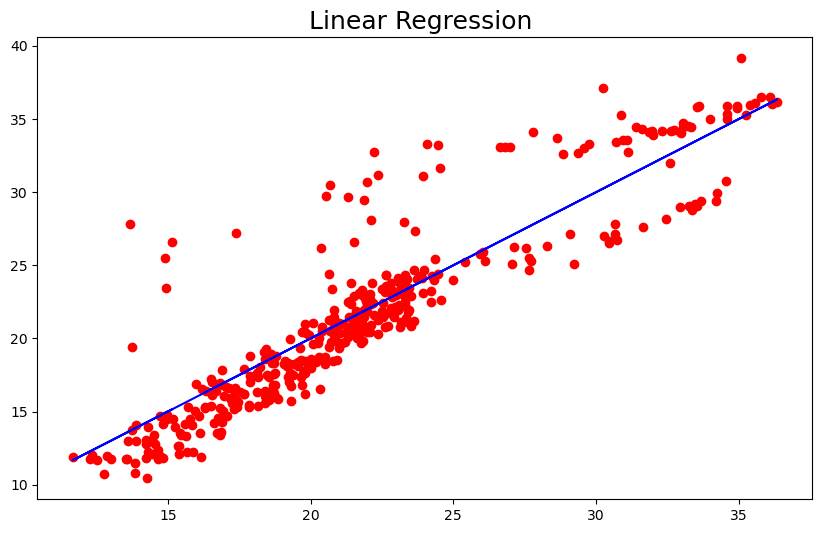

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel='Actual'
plt.ylabel='Predicted'
plt.title('Linear Regression ', fontsize = 18)

plt.show()

In [67]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_RFR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_RFR))
print('mean squared error : ',mean_squared_error(y_test, pred_RFR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score :  0.8382970753600593
R2 Score on training data :  96.40429788952486
mean absolute error :  1.5563905483999005
mean squared error :  6.886544029642704
root mean squared error :  2.6242225571857856


In [68]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.825227168715808
R2 Score on training data :  84.88156457388965
mean absolute error :  1.6654050115469623
mean squared error :  7.44316035411161
root mean squared error :  2.7282155989055576


In [69]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.868760155125681
R2 Score on training data :  87.30480407515684
mean absolute error :  1.3820721795436985
mean squared error :  5.589193715468765
root mean squared error :  2.364147566347914


In [76]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  0.7313857826210897
R2 Score on training data :  69.00827018155714
mean absolute error :  2.5318748520949614
mean squared error :  11.439642412694958
root mean squared error :  3.382254043192935


In [70]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.8199019532944375
R2 Score on training data :  75.45332751752363
mean absolute error :  1.8909857905839327
mean squared error :  7.669948648437501
root mean squared error :  2.769467213822453


In [71]:
# Do cross validation for the models to validate model performance

from sklearn.model_selection import cross_val_score

#cross_val_score(model/estimate, features, target, CV=5, scoring='r2')

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_LR) - score.mean())

[0.80206621 0.70368292 0.82713249 0.76520096 0.75693178]
0.7710028733429565
Difference between R2 score and cross validation score is  0.04899056457998452


In [72]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_RFR) - score.mean())

[0.81135151 0.70087177 0.83516209 0.80667893 0.79400845]
0.7896145492490398
Difference between R2 score and cross validation score is  0.04868252611101942


In [73]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[0.84842437 0.70423543 0.83843438 0.80244491 0.80335227]
0.7993782707365804
Difference between R2 score and cross validation score is  0.025848897979227625


In [75]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[0.86713638 0.74516606 0.88423007 0.83426702 0.82239012]
0.8306379277944839
Difference between R2 score and cross validation score is  0.03812222733119719


In [79]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_lasso) - score.mean())

[0.73269391 0.66435477 0.72955848 0.70640703 0.70202052]
0.7070069414518415
Difference between R2 score and cross validation score is  0.024378841169248155


In [80]:
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_ridge) - score.mean())

[0.8020249  0.70380803 0.8270141  0.76524763 0.75693702]
0.7710063337552938
Difference between R2 score and cross validation score is  0.048895619539143675


In [91]:
# KNN parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [90]:
# The model with the least dif the best choice 
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Score:  0.7812597694085894


In [87]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [93]:
model= KNN(n_neighbors=7,p=2, weights='uniform')

In [94]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score :  0.8443979912547404
mean absolute error :  1.5738923978120196
mean squared error :  6.626720491983013
root mean squared error :  2.574241731458608


In [96]:
# Save model

import joblib
import pickle

filename = 'MedicalInsurance.pkl'
pickle.dump(model,open(filename, 'wb'))

In [97]:
loaded_model = pickle.load(open('MedicalInsurance.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

84.43979912547404


In [98]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])

In [99]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
Predicted,17.154049,17.897243,23.898725,28.863623,19.390342,20.705348,22.354121,14.520154,18.411649,11.948936,...,20.577652,20.076317,21.624131,33.760282,17.647627,20.455331,36.014513,16.782165,20.237461,19.151139
Original,15.297510,27.224318,24.004117,26.223889,15.271914,20.618390,21.732605,14.521977,15.317912,10.779083,...,18.140589,30.488373,19.704638,36.162602,15.559444,26.592955,35.794926,17.398174,18.730778,26.608292
